## Series
Series是pandas系列里的一维数组，它可以包含任何数据类型的标签。我们主要使用它们来处理时间序列数据。

### 修改索引

创造一个series,获取series的名称。

In [1]:
import pandas as pd
import numpy as np

s = pd.Series([1, 2, np.nan, 4, 5])
print (s)
print (s.name)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64
None


添加名称，获取索引。

In [2]:
s.name = "Price Series"
print (s.name)
print (s.index)

Price Series
RangeIndex(start=0, stop=5, step=1)


修改索引

In [3]:
new_index = pd.date_range("20160101",periods=len(s), freq="D")
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


### 访问系列元素

系列的访问通常使用iloc[]和loc[]的方法。我们使用iloc[]来访问元素的整数索引和我们使用loc[]来访问指数序列的。

访问单个整数索引：

In [4]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


访问范围的整数索引，从0到5，间隔2：

In [5]:
print(s.iloc[0:5:2])

2016-01-01    1.0
2016-01-03    NaN
2016-01-05    5.0
Freq: 2D, Name: Price Series, dtype: float64


访问单个与范围的指数序列：

In [6]:
print(s.loc['20160101'])
print(s.loc['20160102':'20160104'])

1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Price Series, dtype: float64


### 布尔索引

除了上述访问方法,您可以使用布尔过滤序列数组。比较序列与标准是否一致。当与您设定的任何条件相比,这次你返回另一个系列中,回填满了布尔值。

In [7]:
print (s < 3)
print (s.loc[s < 3])
print (s.loc[(s < 3) & (s > 1)])

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Price Series, dtype: bool
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Price Series, dtype: float64
2016-01-02    2.0
Freq: D, Name: Price Series, dtype: float64


### 索引和时间序列

因为我们使用Series处理时间序列,值得涵盖一点是我们如何处理时间组件。对于我们的目的,我们使用pandas时间戳的对象。通过excel获取数据,进行resample()、data_range()、reindex()。

In [8]:
import pandas as pd

data = pd.read_excel('sz50.xlsx', sheetname=0, index_col='datetime')
print (data.index)

DatetimeIndex(['2017-01-03 15:00:00', '2017-01-04 15:00:00',
               '2017-01-05 15:00:00', '2017-01-06 15:00:00',
               '2017-01-09 15:00:00', '2017-01-10 15:00:00',
               '2017-01-11 15:00:00', '2017-01-12 15:00:00',
               '2017-01-13 15:00:00', '2017-01-16 15:00:00',
               ...
               '2017-11-07 15:00:00', '2017-11-08 15:00:00',
               '2017-11-09 15:00:00', '2017-11-10 15:00:00',
               '2017-11-13 15:00:00', '2017-11-14 15:00:00',
               '2017-11-15 15:00:00', '2017-11-16 15:00:00',
               '2017-11-17 15:00:00', '2017-11-20 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=215, freq=None)


只保留data中的close，获取data的数据类型与前5个值：

In [9]:
Series = data.close

In [10]:
Series.head()

datetime
2017-01-03 15:00:00    115.99
2017-01-04 15:00:00    116.28
2017-01-05 15:00:00    116.07
2017-01-06 15:00:00    115.21
2017-01-09 15:00:00    115.35
Name: close, dtype: float64

用resample给每个月的最后一天抽样。

In [11]:
monthly_prices = Series.resample('M').last()
print(monthly_prices.head(5))

datetime
2017-01-31    119.41
2017-02-28    118.06
2017-03-31    114.00
2017-04-30    108.30
2017-05-31    120.37
Freq: M, Name: close, dtype: float64


In [12]:
monthly_prices_med = Series.resample('M').median()
monthly_prices_med.head(10)

datetime
2017-01-31    116.565
2017-02-28    118.985
2017-03-31    115.500
2017-04-30    109.800
2017-05-31    107.700
2017-06-30    118.825
2017-07-31    125.440
2017-08-31    119.620
2017-09-30    120.660
2017-10-31    121.780
Freq: M, Name: close, dtype: float64

用月初的值来替代月底的值：

In [13]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]
first_of_month_prices = Series.resample('M').apply(custom_resampler)
first_of_month_prices.head(5)

datetime
2017-01-31    115.99
2017-02-28    118.42
2017-03-31    117.85
2017-04-30    115.07
2017-05-31    107.95
Freq: M, Name: close, dtype: float64

### 缺失数据

当我们处理实际数据,有一个非常现实的遭遇缺失值的可能性。真实数据充斥着洞和pandas提供我们处理它们的方法。有时重新取样或重建索引可以创建NaN值。 
幸运的是,pandas为我们提供了处理它们的方法。我们有两个处理缺失数据的主要手段，一个是fillna,另一个是dropna

In [14]:
from datetime import datetime

data_s= Series.loc[datetime(2017,1,1):datetime(2017,1,10)]
data_r=data_s.resample('D').mean() #插入每一天
print(data_r.head(10))

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-07       NaN
2017-01-08       NaN
2017-01-09    115.35
Freq: D, Name: close, dtype: float64


第一个是填写缺失的数据与fillna()。例如,假设我们想填写缺失的天为前一天的价格。

In [15]:
print(data_r.head(10).fillna(method='ffill'))

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-07    115.21
2017-01-08    115.21
2017-01-09    115.35
Freq: D, Name: close, dtype: float64


我们的下一个选择是明显更有吸引力。我们可以简单地把缺失的数据使用dropna()方法。这是比填充任意数字到NaN值是更好的选择。

In [16]:
print (data_r.head(10).dropna())

datetime
2017-01-03    115.99
2017-01-04    116.28
2017-01-05    116.07
2017-01-06    115.21
2017-01-09    115.35
Name: close, dtype: float64


### 用pandas做时间序列分析

让我们对最初的价格做一些基本的时间序列分析。每个Pandas的series都有一个内置命令绘制方法。

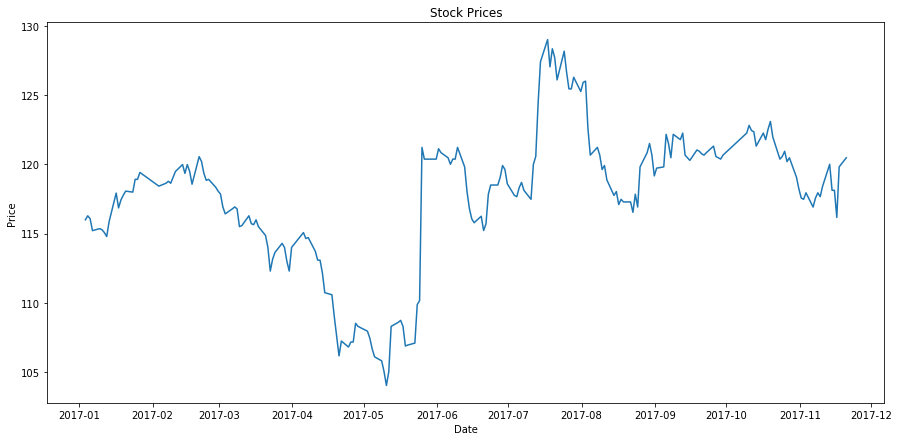

Mean:  close     1.175847e+02
high      1.183641e+02
low       1.166405e+02
open      1.174699e+02
volume    2.316468e+07
dtype: float64
Standard deviation:  close     4.986152e+00
high      5.124896e+00
low       4.957379e+00
open      4.991697e+00
volume    1.427007e+07
dtype: float64
Summary Statistics             close        high         low        open        volume
count  215.000000  215.000000  215.000000  215.000000  2.150000e+02
mean   117.584744  118.364140  116.640465  117.469860  2.316468e+07
std      4.986152    5.124896    4.957379    4.991697  1.427007e+07
min    104.030000  105.240000  103.320000  103.680000  7.934100e+06
25%    115.605000  116.230000  114.935000  115.640000  1.400633e+07
50%    118.340000  119.160000  117.490000  118.220000  1.889732e+07
75%    120.510000  121.310000  119.710000  120.280000  2.811195e+07
max    129.000000  131.340000  126.840000  127.970000  1.021512e+08


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(Series)
plt.title("Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

print ("Mean: ", data.mean())
print ("Standard deviation: ", data.std())
print ("Summary Statistics", data.describe())

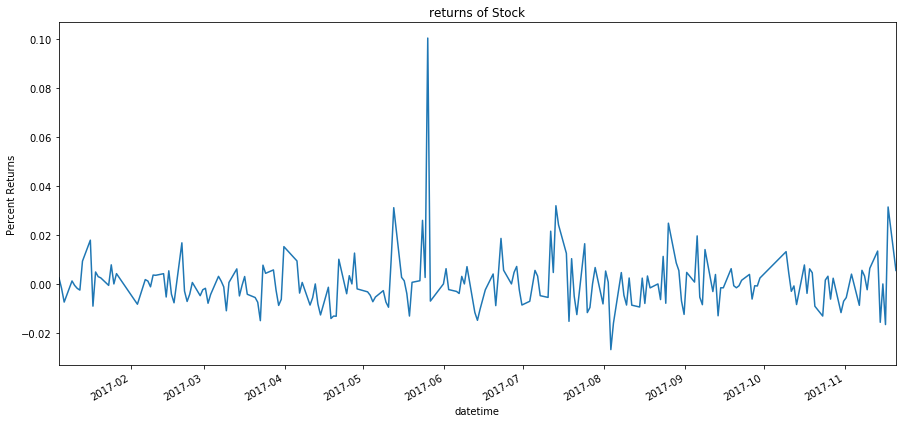

In [18]:
add_returns = Series.diff()[1:]
mult_returns = Series.pct_change()[1:]

plt.figure(figsize=(15, 7))
plt.title("returns of Stock")
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot()
plt.show()

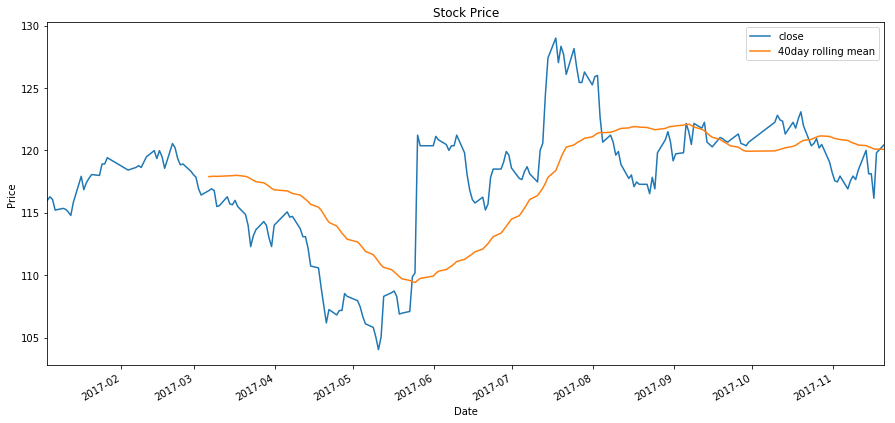

In [19]:
rolling_mean = Series.rolling(window=40).mean()
rolling_mean.name = "40day rolling mean"

plt.figure(figsize=(15, 7))
Series.plot()
rolling_mean.plot()
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

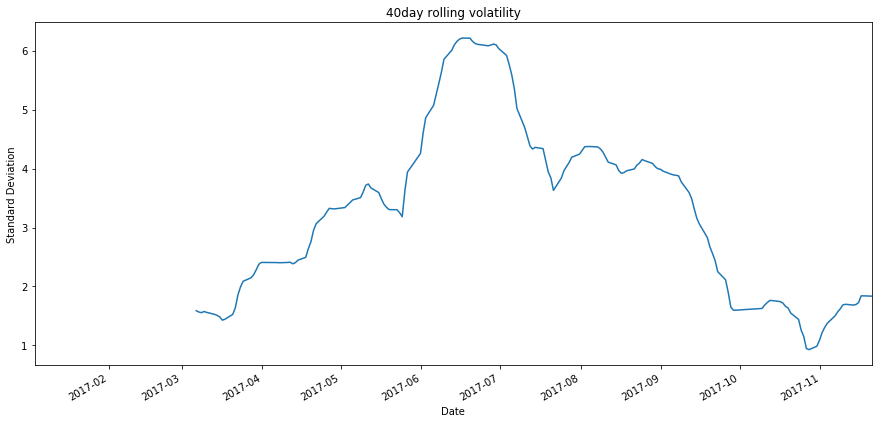

In [20]:
rolling_std = Series.rolling(window=40).std()
rolling_std.name = "40day rolling volatility"

plt.figure(figsize=(15, 7))
rolling_std.plot()
plt.title(rolling_std.name)
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()